# Support vector machine 

Add description. 

Import libraries. 

In [1]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix 
from collections import Counter

# Import data 

In [5]:
# Load the data into pandas dataframes
X_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_train_res.csv')
y_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/y_train_res.csv')
X_test = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_test.csv')
y_test = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/y_test.csv')

X_train_res = X_train_res.drop(columns='Unnamed: 0', axis=1)
y_train_res = y_train_res.drop(columns='Unnamed: 0', axis=1)
X_test = X_test.drop(columns='Unnamed: 0', axis=1)
y_test = y_test.drop(columns='Unnamed: 0', axis=1)

# Convert the DataFrame to a NumPy array
# y_test = y_test.to_numpy()

# Display the first few rows of each dataframe to verify the loading
print("X_train_res:")
display(X_train_res.head())

print("\ny_train_res:")
display(y_train_res.head())

print("\nX_test:")
display(X_test.head())

print("\ny_test:")
# print(y_test)
display(y_test.head())

# Convert the DataFrame to a 1-dimensional NumPy array
y_train_res = y_train_res.values.ravel()
y_test = y_test.values.ravel()

X_train_res_gender = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_train_res_gender.csv')
X_train_res_gender = X_train_res_gender.drop(columns='Unnamed: 0', axis=1)

X_test_gender = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_test_gender.csv')
X_test_gender = X_test_gender.drop(columns='Unnamed: 0', axis=1)


display(X_train_res_gender)
display(X_test_gender)

X_train_res:


,VVR_1,VVR_2,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,12.0,13.0,-0.070220,-0.403569,-0.161650,0.428359,-0.673859,-0.387663,0.994371,0.345623,...,-0.537730,0.225549,-1.036133,-0.951754,-1.025247,-1.526773,-1.479742,-1.237893,-2.161830,-2.049390
1,10.0,10.0,2.226447,1.288304,1.124217,0.514376,0.729448,1.091318,3.433959,2.208680,...,0.774622,0.458331,0.368352,0.632011,1.209277,-0.225126,-0.001447,0.619766,-0.202961,-0.127515
2,8.0,8.0,-0.328541,-0.286339,-0.049149,0.514376,-0.191466,-0.152619,-0.351110,-0.286124,...,0.539267,0.408449,0.316323,0.450683,-0.834081,-0.909004,-0.642000,0.297037,-1.125698,-0.981679
3,10.0,8.0,-0.179816,1.024130,0.956659,0.514376,0.292720,0.824388,-0.176376,0.226388,...,0.891064,0.458331,0.480862,0.766552,-0.208294,0.810246,0.749643,0.257680,0.422548,0.743912
4,8.0,8.0,-0.687261,-0.791730,-0.584920,0.514376,-0.763173,-0.767495,-0.530851,-0.455929,...,-0.558621,0.366881,-0.858611,-0.877156,-0.419249,-0.490562,-0.230352,-0.340549,-0.573360,-0.444615



y_train_res:


,VVR_group
0,1
1,1
2,0
3,0
4,0



X_test:


,VVR_1,VVR_2,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,10.0,11.0,-1.088267,-0.486929,-0.245322,-0.094909,-0.387079,-0.373556,-0.296967,1.267608,...,-1.106604,-1.661648,-0.939358,-1.258986,-0.862599,0.657150,0.649175,0.619766,0.540339,0.684272
1,19.0,21.0,0.160204,0.681681,0.725849,0.514376,0.751085,0.775827,0.031562,0.457413,...,1.791290,0.458331,1.507769,1.887518,-0.111414,0.662918,0.653014,0.478080,0.552052,0.691181
2,8.0,8.0,-0.510947,-0.678086,-0.451146,-0.130749,-0.740730,-0.650167,-0.512662,-0.414737,...,0.412202,0.458331,-0.395816,0.012935,0.703933,1.133047,0.952462,0.619766,0.765365,1.028129
3,21.0,21.0,1.139765,0.115481,0.300321,0.406855,0.152945,0.239720,0.621775,-0.239594,...,-0.009577,0.017708,-0.227168,-0.190216,1.476715,0.191834,0.323467,0.493823,0.412243,0.350324
4,11.0,8.0,1.257027,1.622690,1.325337,0.514376,1.084273,1.365502,1.155021,1.601645,...,0.075374,0.217235,-0.256234,-0.149869,-0.194813,-0.655535,-0.383937,-0.104406,-0.685164,-0.617897



y_test:


,VVR_group
0,0
1,1
2,0
3,1
4,0


,VVR_1,VVR_2,Condition,Gender,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,12.000000,13.000000,2,2,-0.070220,-0.403569,-0.161650,0.428359,-0.673859,-0.387663,...,-0.537730,0.225549,-1.036133,-0.951754,-1.025247,-1.526773,-1.479742,-1.237893,-2.161830,-2.049390
1,10.000000,10.000000,3,2,2.226447,1.288304,1.124217,0.514376,0.729448,1.091318,...,0.774622,0.458331,0.368352,0.632011,1.209277,-0.225126,-0.001447,0.619766,-0.202961,-0.127515
2,8.000000,8.000000,3,1,-0.328541,-0.286339,-0.049149,0.514376,-0.191466,-0.152619,...,0.539267,0.408449,0.316323,0.450683,-0.834081,-0.909004,-0.642000,0.297037,-1.125698,-0.981679
3,10.000000,8.000000,1,2,-0.179816,1.024130,0.956659,0.514376,0.292720,0.824388,...,0.891064,0.458331,0.480862,0.766552,-0.208294,0.810246,0.749643,0.257680,0.422548,0.743912
4,8.000000,8.000000,1,2,-0.687261,-0.791730,-0.584920,0.514376,-0.763173,-0.767495,...,-0.558621,0.366881,-0.858611,-0.877156,-0.419249,-0.490562,-0.230352,-0.340549,-0.573360,-0.444615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,15.208788,9.791212,1,1,-0.487217,-0.225515,0.005625,0.181101,-0.528458,-0.206212,...,-0.226106,0.412286,-0.469718,-0.456650,-0.012510,0.388434,0.334707,0.252315,0.284033,0.322442
108,16.925449,10.850899,1,1,-0.629858,-0.610840,-0.380021,0.392113,-0.678192,-0.572561,...,-0.168894,0.458331,-0.072297,-0.205383,-0.447768,-0.289515,-0.066093,0.619766,-0.590136,-0.295949
109,10.986887,11.973774,2,2,1.755451,0.208069,0.373092,0.514376,0.195169,0.312097,...,0.398382,0.458331,0.303690,0.353698,3.025754,1.353332,1.082597,0.619766,1.220385,1.279031
110,15.861224,10.544490,2,2,-0.583734,-0.648807,-0.418202,0.436879,-0.696419,-0.609791,...,0.646099,0.458331,0.929210,0.852713,-0.537762,-0.516713,-0.266038,0.470967,-0.855955,-0.556206


,VVR_1,VVR_2,Gender,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,10.0,11.0,1,-1.088267,-0.486929,-0.245322,-0.094909,-0.387079,-0.373556,-0.296967,...,-1.106604,-1.661648,-0.939358,-1.258986,-0.862599,0.657150,0.649175,0.619766,0.540339,0.684272
1,19.0,21.0,2,0.160204,0.681681,0.725849,0.514376,0.751085,0.775827,0.031562,...,1.791290,0.458331,1.507769,1.887518,-0.111414,0.662918,0.653014,0.478080,0.552052,0.691181
2,8.0,8.0,1,-0.510947,-0.678086,-0.451146,-0.130749,-0.740730,-0.650167,-0.512662,...,0.412202,0.458331,-0.395816,0.012935,0.703933,1.133047,0.952462,0.619766,0.765365,1.028129
3,21.0,21.0,2,1.139765,0.115481,0.300321,0.406855,0.152945,0.239720,0.621775,...,-0.009577,0.017708,-0.227168,-0.190216,1.476715,0.191834,0.323467,0.493823,0.412243,0.350324
4,11.0,8.0,1,1.257027,1.622690,1.325337,0.514376,1.084273,1.365502,1.155021,...,0.075374,0.217235,-0.256234,-0.149869,-0.194813,-0.655535,-0.383937,-0.104406,-0.685164,-0.617897
5,10.0,12.0,1,0.790449,-0.100140,0.118978,0.514376,0.073629,0.068108,0.478215,...,1.295683,0.458331,1.426896,1.528188,0.458794,-0.476317,-0.217535,0.273423,-0.421622,-0.388784
6,13.0,12.0,2,0.281915,-1.509396,-2.338926,-2.794178,-0.240768,-1.408717,0.306897,...,-2.446864,-3.087456,-0.232253,-1.135262,0.525877,-1.865693,-2.711519,-2.908383,-0.124630,-1.701399
7,8.0,8.0,1,-0.396322,-0.317742,-0.078736,-0.066237,-0.373000,-0.232622,-0.356449,...,-0.032940,0.458331,-0.212612,-0.197559,-0.254951,-0.082273,0.114081,-0.206735,-0.252523,-0.035261
8,8.0,8.0,1,-0.420808,-0.184904,0.043912,0.514376,-0.491109,-0.163572,0.109287,...,0.228005,0.366881,0.011080,0.088781,-0.313739,-0.526160,-0.262678,-0.175249,-0.497727,-0.452317
9,16.0,13.0,2,1.025705,2.194399,1.645752,0.363847,1.811794,1.860773,-0.347530,...,1.824795,0.458331,2.279075,2.327687,0.912335,1.767250,1.321341,0.415109,2.270614,1.817769


# Model with inner and outer split - SVC 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html 

In [4]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Create the pipeline with RFE and the model
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe = RFE(estimator=DecisionTreeClassifier())
model = SVC(probability=True)
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

param_grid = {
    'm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'm__gamma': ['scale', 'auto'],  # Kernel coefficient
    'm__class_weight': [{0: 0.6428571428571429, 1: 2.25}, None],  # Class weights
    's__n_features_to_select': [5, 10, 20, 40, 60, 80]  # Number of features to select with RFE
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=pipeline, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Print shape
print(X_train_res.shape)
print(y_train_res.shape)

# Fit model to training data to get best parameters
model.fit(X_train_res, y_train_res)

# Print best parameters
print(model.best_params_)

# Evaluate on the test set
best_model = model.best_estimator_
y_pred = best_model.predict(X_test)

# Print shape
print(y_test.shape)
print(y_pred.shape)

# Print classification report 
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")


# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
# print(metrics.auc(fpr, tpr))

The mean score using nested cross-validation is: 0.866 ± 0.022
(112, 104)
(112,)
{'m__C': 0.1, 'm__class_weight': {0: 0.6428571428571429, 1: 2.25}, 'm__gamma': 'auto', 'm__kernel': 'poly', 's__n_features_to_select': 10}
(32,)
(32,)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.62      0.71      0.67         7

    accuracy                           0.84        32
   macro avg       0.77      0.80      0.78        32
weighted avg       0.85      0.84      0.85        32

[[22  3]
 [ 2  5]]
AUC-PR: 0.689


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


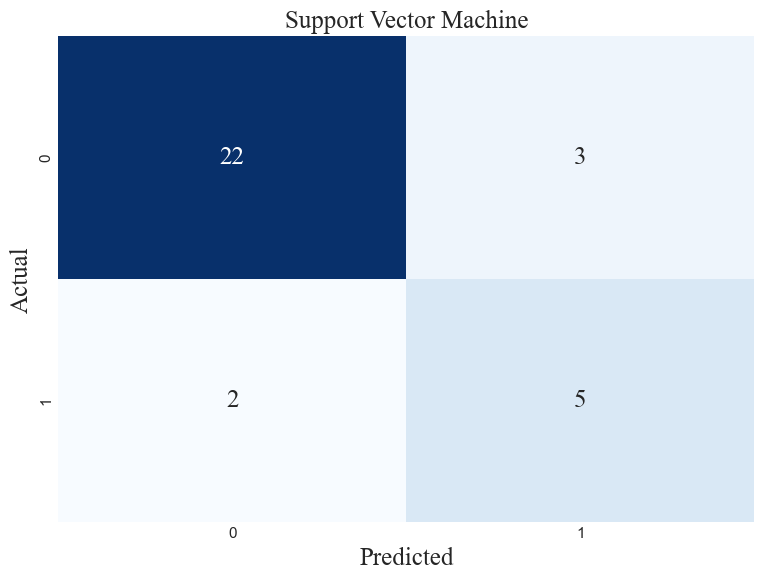

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

font = 'Times New Roman'
size = 18

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')
# Create a custom diverging color map
colors = sns.color_palette("Blues", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False,
            annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
plt.title('Support Vector Machine', fontname=font, fontsize=size)
plt.xlabel('Predicted', fontname=font, fontsize=size)
plt.ylabel('Actual', fontname=font, fontsize=size)

plt.show()


# Shap

In [6]:
import pandas as pd
import os
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
plt.style.use('fivethirtyeight')

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import shap

Using 112 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


The mean score using nested cross-validation is: 0.902 ± 0.026
{'C': 0.1, 'class_weight': {0: 0.6428571428571429, 1: 2.25}, 'gamma': 'auto', 'kernel': 'poly'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.56      0.71      0.62         7

    accuracy                           0.81        32
   macro avg       0.73      0.78      0.75        32
weighted avg       0.83      0.81      0.82        32

[[21  4]
 [ 2  5]]
AUC-PR: 0.747


  0%|          | 0/32 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


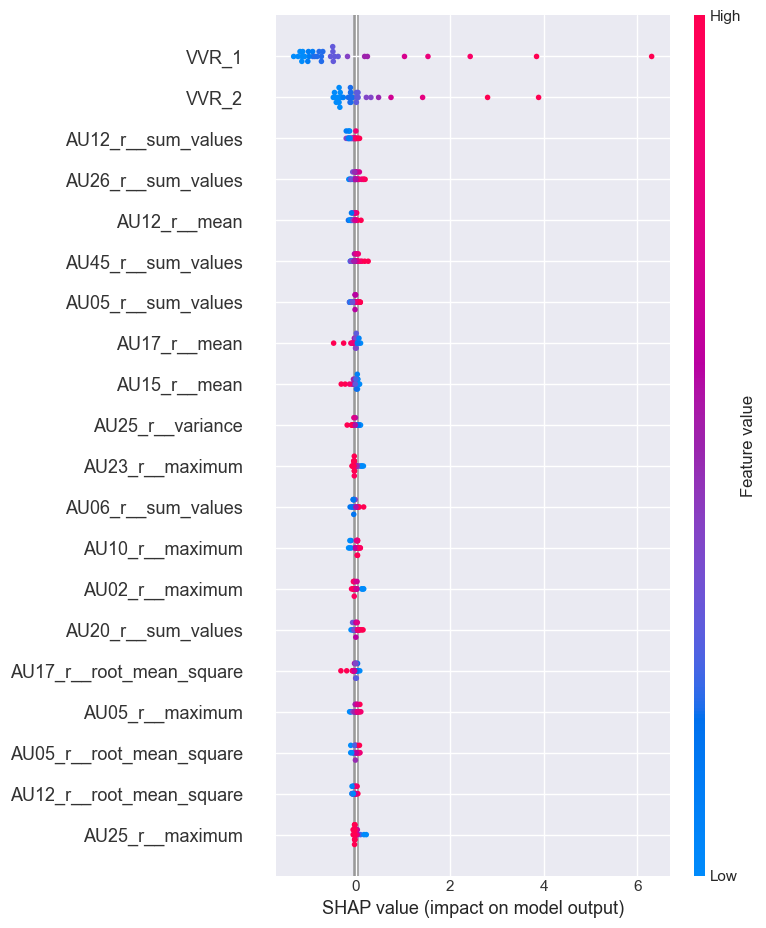

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import shap

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Create the pipeline with just the model (no RFE)
model = SVC(probability=True)

param_grid = {
    'C': [0.1],  # Regularization parameter
    'kernel': ['poly'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
    'class_weight': [{0: 0.6428571428571429, 1: 2.25}],  # Class weights
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Fit model to training data to get best parameters
model.fit(X_train_res, y_train_res)

# Print best parameters
print(model.best_params_)

# Get the best estimator
best_model = model.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")

# Use SHAP to explain the SVM model
explainer = shap.KernelExplainer(best_model.decision_function, X_train_res)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, class_names=["Low VVR group", "High VVR group"])


Using 112 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/32 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


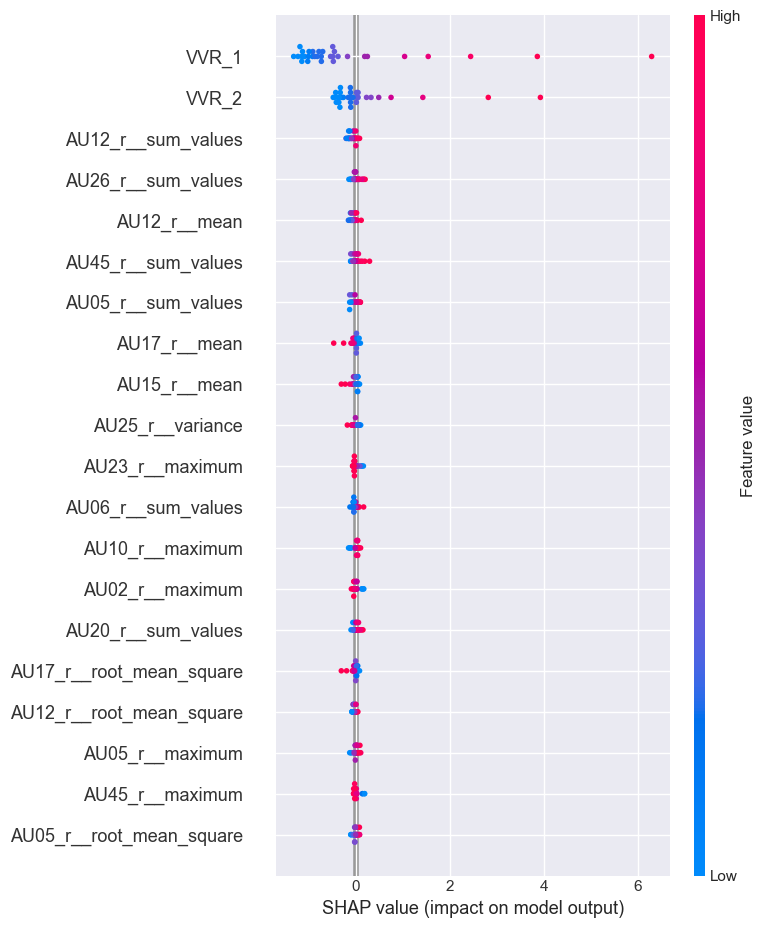

In [21]:
import shap
import matplotlib.pyplot as plt

# Use SHAP to explain the SVM model
explainer = shap.KernelExplainer(best_model.decision_function, X_train_res)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, class_names=["Low VVR group", "High VVR group"])


# Error analysis

In [12]:
X_train_res_gender = X_train_res_gender.drop('Condition', axis=1)
display(X_train_res_gender.head(5))
display(X_test_gender.head(5))

,VVR_1,VVR_2,Gender,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,12.0,13.0,2,-0.070220,-0.403569,-0.161650,0.428359,-0.673859,-0.387663,0.994371,...,-0.537730,0.225549,-1.036133,-0.951754,-1.025247,-1.526773,-1.479742,-1.237893,-2.161830,-2.049390
1,10.0,10.0,2,2.226447,1.288304,1.124217,0.514376,0.729448,1.091318,3.433959,...,0.774622,0.458331,0.368352,0.632011,1.209277,-0.225126,-0.001447,0.619766,-0.202961,-0.127515
2,8.0,8.0,1,-0.328541,-0.286339,-0.049149,0.514376,-0.191466,-0.152619,-0.351110,...,0.539267,0.408449,0.316323,0.450683,-0.834081,-0.909004,-0.642000,0.297037,-1.125698,-0.981679
3,10.0,8.0,2,-0.179816,1.024130,0.956659,0.514376,0.292720,0.824388,-0.176376,...,0.891064,0.458331,0.480862,0.766552,-0.208294,0.810246,0.749643,0.257680,0.422548,0.743912
4,8.0,8.0,2,-0.687261,-0.791730,-0.584920,0.514376,-0.763173,-0.767495,-0.530851,...,-0.558621,0.366881,-0.858611,-0.877156,-0.419249,-0.490562,-0.230352,-0.340549,-0.573360,-0.444615


,VVR_1,VVR_2,Gender,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,10.0,11.0,1,-1.088267,-0.486929,-0.245322,-0.094909,-0.387079,-0.373556,-0.296967,...,-1.106604,-1.661648,-0.939358,-1.258986,-0.862599,0.657150,0.649175,0.619766,0.540339,0.684272
1,19.0,21.0,2,0.160204,0.681681,0.725849,0.514376,0.751085,0.775827,0.031562,...,1.791290,0.458331,1.507769,1.887518,-0.111414,0.662918,0.653014,0.478080,0.552052,0.691181
2,8.0,8.0,1,-0.510947,-0.678086,-0.451146,-0.130749,-0.740730,-0.650167,-0.512662,...,0.412202,0.458331,-0.395816,0.012935,0.703933,1.133047,0.952462,0.619766,0.765365,1.028129
3,21.0,21.0,2,1.139765,0.115481,0.300321,0.406855,0.152945,0.239720,0.621775,...,-0.009577,0.017708,-0.227168,-0.190216,1.476715,0.191834,0.323467,0.493823,0.412243,0.350324
4,11.0,8.0,1,1.257027,1.622690,1.325337,0.514376,1.084273,1.365502,1.155021,...,0.075374,0.217235,-0.256234,-0.149869,-0.194813,-0.655535,-0.383937,-0.104406,-0.685164,-0.617897


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Create the pipeline with just the model (no RFE)
model = SVC(probability=True)

param_grid = {
    'C': [0.1],  # Regularization parameter
    'kernel': ['poly'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
    'class_weight': [{0: 0.6428571428571429, 1: 2.25}],  # Class weights
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Check if 'gender' column exists in X_train_res
if 'gender' in X_train_res.columns:
    X_train_res_dropped = X_train_res.drop('gender', axis=1)
else:
    X_train_res_dropped = X_train_res

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res_dropped, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Fit model to training data to get best parameters
model.fit(X_train_res_dropped, y_train_res)

# Print best parameters
print(model.best_params_)

# Get the best estimator
best_model = model.best_estimator_

# Ensure 'gender' column is present in X_test
if 'gender' in X_test.columns:
    X_test_dropped = X_test_gender.drop('Gender', axis=1)
else:
    X_test_dropped = X_test

# Evaluate on the test set
y_pred = best_model.predict(X_test_dropped)

# Print classification report and confusion matrix
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test_dropped)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")

# Error analysis for gender
gender_labels = X_test_gender['Gender']  # Ensure 'gender' is present in X_test_gender
male_indices = (gender_labels == 1)
female_indices = (gender_labels == 2)

# Extract true and predicted labels for male and female samples
y_test_male = y_test[male_indices]
y_pred_male = y_pred[male_indices]

y_test_female = y_test[female_indices]
y_pred_female = y_pred[female_indices]

# Generate confusion matrix for males and females
confusion_matrix_male = confusion_matrix(y_test_male, y_pred_male)
confusion_matrix_female = confusion_matrix(y_test_female, y_pred_female)

# Print confusion matrices
print("\nConfusion Matrix for Males:")
print(confusion_matrix_male)

print("\nConfusion Matrix for Females:")
print(confusion_matrix_female)

# Print classification reports for males and females
print("\nClassification Report for Males:")
print(classification_report(y_test_male, y_pred_male))

print("\nClassification Report for Females:")
print(classification_report(y_test_female, y_pred_female))



The mean score using nested cross-validation is: 0.902 ± 0.026
{'C': 0.1, 'class_weight': {0: 0.6428571428571429, 1: 2.25}, 'gamma': 'auto', 'kernel': 'poly'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.56      0.71      0.62         7

    accuracy                           0.81        32
   macro avg       0.73      0.78      0.75        32
weighted avg       0.83      0.81      0.82        32

[[21  4]
 [ 2  5]]
AUC-PR: 0.747

Confusion Matrix for Males:
[[14  1]
 [ 2  0]]

Confusion Matrix for Females:
[[7 3]
 [0 5]]

Classification Report for Males:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.00      0.00      0.00         2

    accuracy                           0.82        17
   macro avg       0.44      0.47      0.45        17
weighted avg       0.77      0.82      0.80  